In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score, f1_score, roc_auc_score

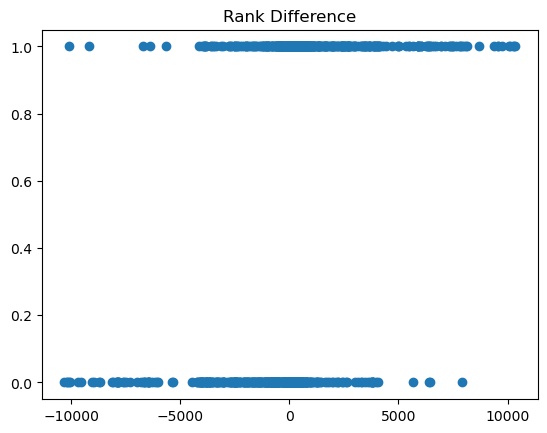

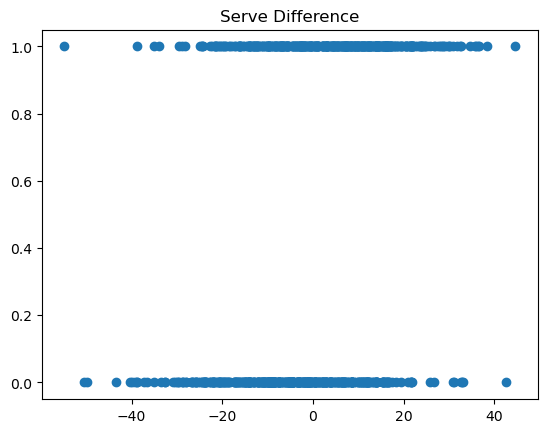

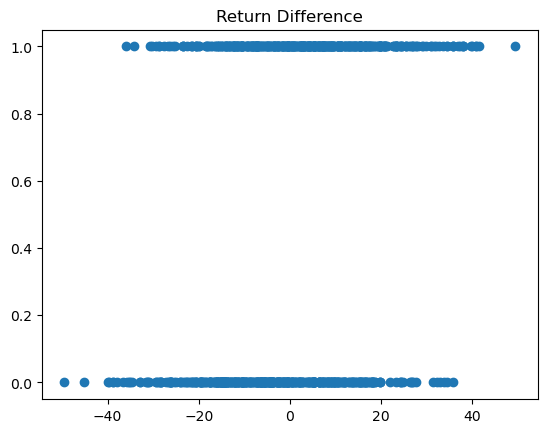

In [2]:
overall_df = pd.read_csv('overall_df.csv')
overall_df = overall_df.drop(['Unnamed: 0'], axis=1)
overall_df['rank_diff'] = overall_df.winner_rank - overall_df.loser_rank
overall_df['serve_diff'] = overall_df.winner_serve_rating - overall_df.loser_serve_rating
overall_df['return_diff'] = overall_df.winner_return_rating - overall_df.loser_return_rating


X = np.array(overall_df[['rank_diff', 'serve_diff', 'return_diff']])
y = np.ones((len(X),1))


for i in range(0, len(X), 2):
  X[i] = X[i]*-1
  y[i] = 0

fig1 = plt.figure('Ranking Difference')
plt.title('Rank Difference')
plt.scatter(X[:,0],y)
fig2 = plt.figure('Serve Difference')
plt.title('Serve Difference')
plt.scatter(X[:,1],y)
fig3 = plt.figure('Return Difference')
plt.title('Return Difference')
plt.scatter(X[:,2],y)

/Users/haonan/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0, 0.5, 'Probability of Victory')

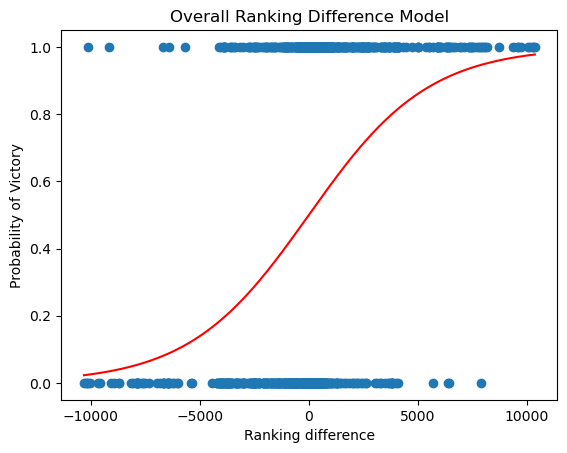

In [3]:
rank_X =  np.array([[x] for x in X[:, 0]])
rank_model = LogisticRegression().fit(rank_X, y)
fig1 = plt.figure('Overall Ranking Difference Model')
plt.title('Overall Ranking Difference Model')
plt.scatter(X[:,0],y, label = "match_data")
fit_x = np.linspace(np.min(rank_X.flatten()), np.max(rank_X.flatten()), 1000)
fit_x = [[x] for x in fit_x]
plt.plot(fit_x, rank_model.predict_proba(fit_x)[:, 1], color = "red", label = "model fit")
plt.xlabel("Ranking difference")
plt.ylabel("Probability of Victory")

In [4]:
thresholds = np.linspace(0, 1.0, 100)
precisions = []
recalls = []
f1s = []
rocaucs = []
for threshold in thresholds:
    yhat = []
    for x in rank_X.flatten():
        if rank_model.predict_proba([[x]])[0, 1] >= threshold:
            yhat.append(1)
        if rank_model.predict_proba([[x]])[0, 1] < threshold:
            yhat.append(0)
    precisions.append(precision_score(y, yhat))
    recalls.append(recall_score(y, yhat))
    f1s.append(f1_score(y, yhat))
    rocaucs.append(roc_auc_score(y, yhat))
precisions = np.array(precisions)
recalls = np.array(recalls)

/Users/haonan/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/haonan/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/haonan/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


threshold
[0.38383838]


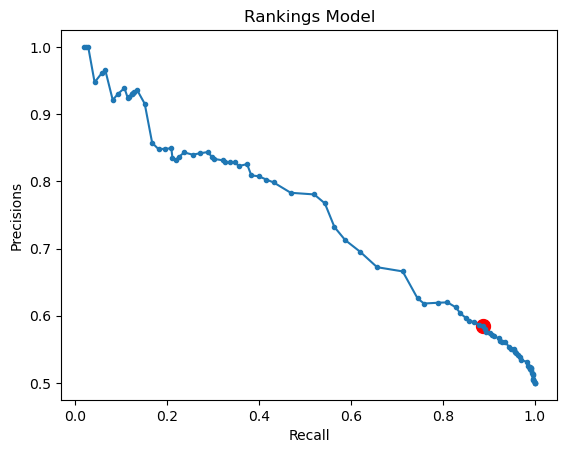

In [5]:
plt.figure()
plt.plot(recalls[np.where(recalls != 0)], precisions[:-1][np.where(recalls != 0)],  marker = ".")
max_index = np.where(f1s == np.max(f1s))

plt.scatter(recalls[max_index], precisions[max_index], color = "red", marker = "o", s = 100)
plt.xlabel("Recall")
plt.ylabel("Precisions")
plt.title("Rankings Model")
print('threshold')
print(thresholds[max_index])

threshold
[0.54545455]


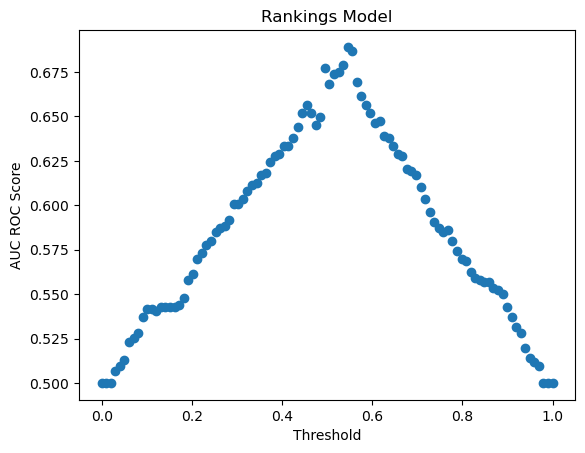

In [6]:
max_index = np.where(rocaucs == np.max(rocaucs))
plt.figure()
plt.scatter(thresholds, rocaucs)
plt.xlabel("Threshold")
plt.ylabel("AUC ROC Score")
plt.title("Rankings Model")
print("threshold")
print(thresholds[max_index])

/Users/haonan/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0, 0.5, 'Probability of Victory')

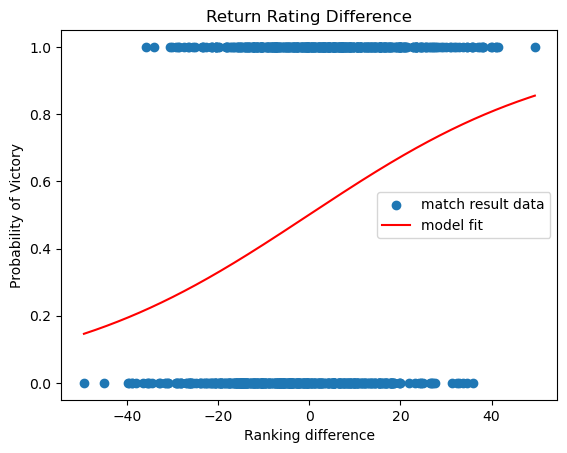

In [7]:
return_X =  np.array([[x] for x in X[:, 2]])
return_model = LogisticRegression().fit(return_X, y)
fig1 = plt.figure('Return Rating Difference')
plt.title('Return Rating Difference')
plt.scatter(X[:,2],y, label = "match result data")
fit_x = np.linspace(np.min(return_X.flatten()), np.max(return_X.flatten()), 1000)
fit_x = [[x] for x in fit_x]
plt.plot(fit_x, return_model.predict_proba(fit_x)[:, 1], color = "red", label = "model fit")
plt.legend()
plt.xlabel("Ranking difference")
plt.ylabel("Probability of Victory")

In [8]:
thresholds = np.linspace(0, 1.0, 100)
precisions = []
recalls = []
f1s = []
rocaucs = []
for threshold in thresholds:
    yhat = []
    for x in return_X.flatten():
        if return_model.predict_proba([[x]])[0, 1] >= threshold:
            yhat.append(1)
        if return_model.predict_proba([[x]])[0, 1] < threshold:
            yhat.append(0)
    precisions.append(precision_score(y, yhat))
    recalls.append(recall_score(y, yhat))
    f1s.append(f1_score(y, yhat))
    rocaucs.append(roc_auc_score(y, yhat))
precisions = np.array(precisions)
recalls = np.array(recalls)

/Users/haonan/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/haonan/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/haonan/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/haonan/anaconda3/envs/info2950/lib/pyth

threshold
[0.37373737]


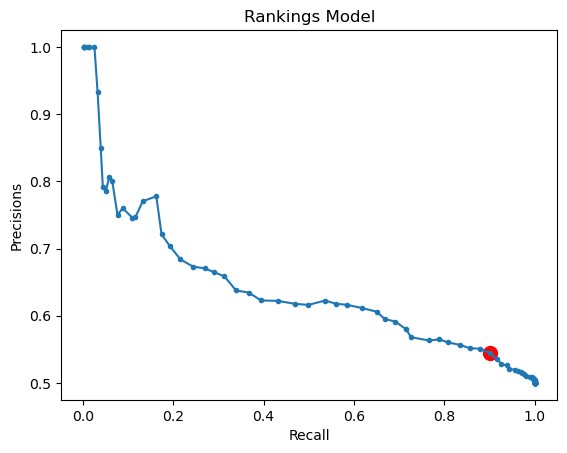

In [9]:
plt.figure()
plt.plot(recalls[np.where(recalls != 0)], precisions[:-1][np.where(recalls != 0)],  marker = ".")
max_index = np.where(f1s == np.max(f1s))

plt.scatter(recalls[max_index], precisions[max_index], color = "red", marker = "o", s = 100)
plt.xlabel("Recall")
plt.ylabel("Precisions")
plt.title("Rankings Model")
print('threshold')
print(thresholds[max_index])

threshold
[0.48484848]


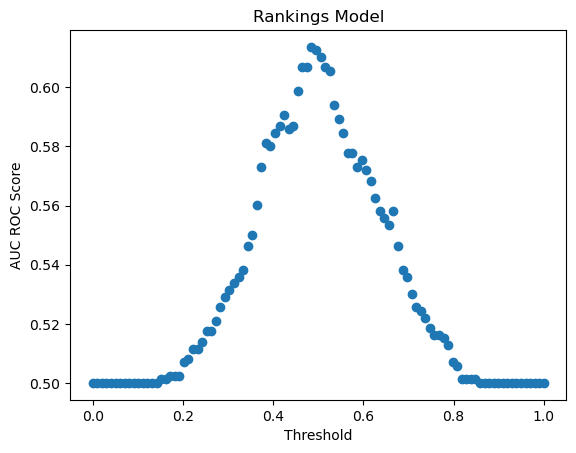

In [10]:
max_index = np.where(rocaucs == np.max(rocaucs))
plt.figure()
plt.scatter(thresholds, rocaucs)
plt.xlabel("Threshold")
plt.ylabel("AUC ROC Score")
plt.title("Rankings Model")
print("threshold")
print(thresholds[max_index])

/Users/haonan/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0, 0.5, 'Probability of Victory')

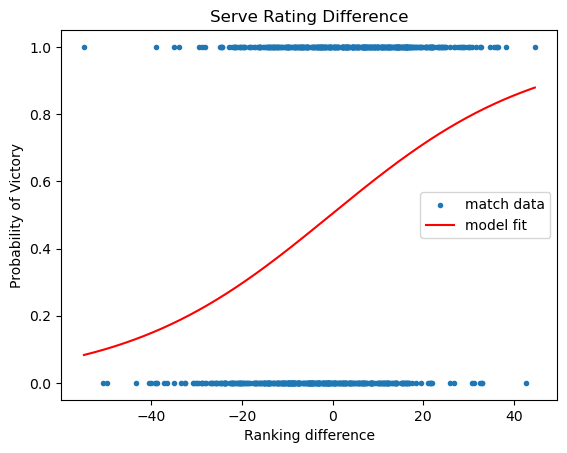

In [11]:
serve_X =  np.array([[x] for x in X[:, 1]])
serving_model = LogisticRegression().fit(serve_X, y)
fig1 = plt.figure('Serve Rating Difference')
plt.title('Serve Rating Difference')
plt.scatter(X[:,1],y, label = "match data", marker = '.')
fit_x = np.linspace(np.min(serve_X.flatten()), np.max(serve_X.flatten()), 1000)
fit_x = [[x] for x in fit_x]
plt.plot(fit_x, serving_model.predict_proba(fit_x)[:, 1], color = "red", label = "model fit")
plt.legend()
plt.xlabel("Ranking difference")
plt.ylabel("Probability of Victory")

In [12]:
thresholds = np.linspace(0, 1.0, 100)
precisions = []
recalls = []
f1s = []
rocaucs = []
for threshold in thresholds:
    yhat = []
    for x in serve_X.flatten():
        if serving_model.predict_proba([[x]])[0, 1] >= threshold:
            yhat.append(1)
        if serving_model.predict_proba([[x]])[0, 1] < threshold:
            yhat.append(0)
    precisions.append(precision_score(y, yhat))
    recalls.append(recall_score(y, yhat))
    f1s.append(f1_score(y, yhat))
    rocaucs.append(roc_auc_score(y, yhat))
precisions = np.array(precisions)
recalls = np.array(recalls)

/Users/haonan/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/haonan/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/haonan/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/haonan/anaconda3/envs/info2950/lib/pyth

threshold
[0.28282828]


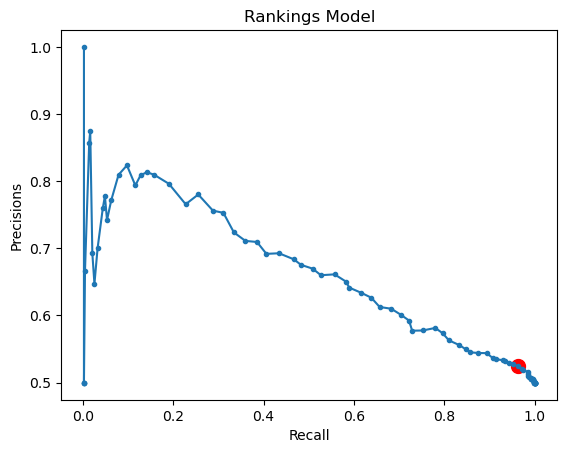

In [13]:
plt.figure()
plt.plot(recalls[np.where(recalls != 0)], precisions[:-1][np.where(recalls != 0)],  marker = ".")
max_index = np.where(f1s == np.max(f1s))

plt.scatter(recalls[max_index], precisions[max_index], color = "red", marker = "o", s = 100)
plt.xlabel("Recall")
plt.ylabel("Precisions")
plt.title("Rankings Model")
print('threshold')
print(thresholds[max_index])

threshold
[0.53535354]


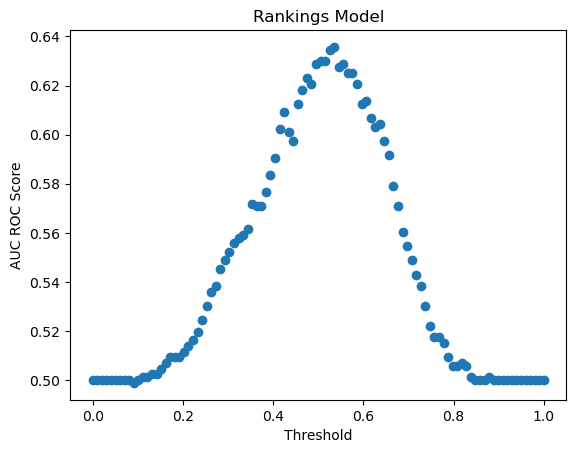

In [14]:
max_index = np.where(rocaucs == np.max(rocaucs))
plt.figure()
plt.scatter(thresholds, rocaucs)
plt.xlabel("Threshold")
plt.ylabel("AUC ROC Score")
plt.title("Rankings Model")
print("threshold")
print(thresholds[max_index])

For the rank model, for a 1 unit increase in points, the probability that a player wins increases by e^(0.000364)
For the serve model, for a 1 unit increase in points, the probability that a player wins increases by e^(0.0441)
For the return model, for a 1 unit increase in points, the probability that a player wins increases by e^(0.0357)
For the multivariable model, for a 1 unit increase in rank points, all else remaining the same, the probability that a player wins increases by e^(0.000187).
For a 1 unit increase in serving points, all else remaining the same, the probability that a player wins increases by e^(0.0335)
For a 1 unit increase in return points, all else remaining the same, the probability that a player wins increases by e&(0.0259)

The coefficients for the models are low, which supports the figures having very gradual slopes. Even the highest differences only provide a 90 percent chance of winning in the models. This shows that the rating differences do not have a very large impact on the outcome of matches. There are a lot of instances where a player with lower ratings still wins. There are likely other parameters that have higher impacts on the score. In addition, the players that we are collecting and analyzing data for are the top players in the world. Every player has an extremely high level of skill and experience, and as such at this level the differences in skill are minimal, therefore making the differences in ratings even less impactful.

The intercepts for the models are extremely low, with the rank and return models having an essentially negligible intercept. This shows that when the rating difference between two players is 0, there is a 50/50 percent chance of winning. This makes sense as if their ratings are 0, they should have an equal chance of winning.

In [15]:
model = LogisticRegression().fit(X, y)

print('\n for rank model')
print('coefficient: '+str(rank_model.coef_[0][0]))
print('intercept: '+str(rank_model.intercept_[0]))

print('\n for serve model')
print('coefficient: '+str(serving_model.coef_[0][0]))
print('intercept: '+str(serving_model.intercept_[0]))

print('\n for rank model')
print('coefficient: '+str(return_model.coef_[0][0]))
print('intercept: '+str(return_model.intercept_[0]))

print('\n For multivariate model')
print("rank, serve, and return coefficients: "+str(model.coef_[0][0])+", "+str(model.coef_[0][1])+", "+str(model.coef_[0][2]))
print("intercept: "+str(model.intercept_[0]))



 for rank model
coefficient: 0.00036420371719544817
intercept: -3.9374771857459235e-09

 for serve model
coefficient: 0.044104364120348065
intercept: 0.016442393648689158

 for rank model
coefficient: 0.03574748623621544
intercept: 0.004672702284234553

 For multivariate model
rank, serve, and return coefficients: 0.00018692807701527255, 0.03347634794502018, 0.02585255228487367
intercept: 1.0251277451582133e-05


/Users/haonan/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
model_rank_difference = LogisticRegression().fit(X[:,0], y)

ValueError: Expected 2D array, got 1D array instead:
array=[-7.8500e+02  5.1000e+02 -3.0320e+03 -1.3100e+03 -1.3250e+03  2.0200e+03
 -1.9050e+03  1.7200e+03  1.8500e+02 -5.0000e+01 -2.0100e+03 -2.0600e+03
 -6.1600e+02 -1.0200e+03  4.0400e+02  9.3650e+03 -3.6900e+03  6.8000e+02
 -1.0050e+04  5.0000e+03  3.3200e+03  1.0357e+04  3.5000e+01  6.4230e+03
 -4.2150e+03  7.1900e+02  1.8500e+02  6.4280e+03 -1.5860e+03  6.1900e+02
  3.8040e+03 -3.6050e+03  1.1900e+02  9.7000e+01 -7.7000e+02 -1.2440e+03
 -1.3630e+03 -2.3840e+03  1.2970e+03  7.0000e+02 -5.9000e+02 -6.9000e+01
 -5.3800e+02  1.7600e+02  1.4700e+02 -5.1400e+02  3.9800e+03  1.6200e+03
 -1.6690e+03  6.2000e+01 -1.0220e+03  6.6180e+03 -3.6720e+03  5.9000e+02
 -7.2000e+01  4.0670e+03  1.8900e+02  5.5400e+02 -1.0213e+04  1.0770e+03
 -9.1300e+02  2.6780e+03 -2.9500e+02  1.9730e+03 -3.6430e+03  5.9000e+01
 -3.9040e+03  1.0390e+03 -1.4000e+02  2.7600e+02  5.6500e+02 -2.9500e+02
 -1.9050e+03 -5.6750e+03 -2.8790e+03  4.0670e+03  7.0000e+02  3.4400e+03
 -3.1950e+03  8.7050e+03  1.0000e+02  1.3550e+03  1.2200e+03 -6.4000e+02
 -1.6000e+02 -5.1000e+01 -6.7500e+02  2.9600e+03 -6.2800e+03 -1.0750e+03
 -2.0050e+03  1.0135e+04 -6.6850e+03 -9.7000e+01 -1.5100e+02  2.6730e+03
 -8.0700e+02  3.9250e+03 -3.8380e+03  3.8700e+02 -4.0730e+03  6.1600e+02
  7.8700e+02  1.1400e+02 -4.0670e+03 -4.1300e+02 -6.5000e+01  2.1900e+02
 -2.4780e+03  1.7300e+03 -1.9500e+02  6.9900e+02  1.2480e+03  6.7050e+03
 -8.0700e+03  1.3180e+03 -7.8720e+03 -9.9700e+02  1.0830e+03  7.4300e+02
 -7.5040e+03  1.0210e+03 -8.4000e+01  1.0960e+03 -5.2500e+02 -5.1400e+02
 -8.0700e+02  2.3550e+03 -3.5190e+03  5.0150e+03 -4.0050e+03  6.4000e+02
 -1.3900e+02 -1.9790e+03  5.6000e+02  3.4990e+03  1.8500e+02  5.8800e+03
 -1.9390e+03  6.2940e+03  3.3900e+02 -3.3650e+03 -3.2840e+03  5.3900e+02
  2.3990e+03  7.9300e+02  4.6400e+02  1.3400e+02 -2.8000e+01 -6.7050e+03
 -6.9600e+03  1.3650e+03 -7.8720e+03  3.9800e+02  3.6800e+02  6.6500e+02
  9.9700e+02 -2.0000e+01 -2.4000e+01  9.0000e+02 -1.7200e+03 -1.1600e+03
 -8.0000e+01  4.1300e+02 -1.3900e+02 -3.9250e+03 -4.5000e+01 -2.5000e+03
 -7.6000e+02  2.4150e+03 -6.3000e+01  1.6500e+03 -2.6200e+03  2.5900e+03
  3.6900e+03  1.3050e+03 -8.1450e+03  6.0270e+03 -2.5330e+03  9.5640e+03
 -6.1750e+03  5.4300e+02 -3.2900e+03  6.3480e+03 -9.7000e+01  3.0000e+00
 -2.0600e+03  4.8800e+02 -1.1340e+03 -9.0000e+01 -9.2000e+02  1.4600e+02
 -4.2400e+02 -1.1540e+03 -9.3000e+01  7.8900e+02  3.7500e+02  1.0630e+03
  4.0000e+01  1.4500e+03 -3.8050e+03  4.7050e+03 -1.5900e+03  5.8800e+03
 -5.5000e+02  2.4770e+03 -4.0050e+03  3.8950e+03 -8.1700e+02 -2.6650e+03
 -7.3240e+03 -1.9900e+03 -1.9630e+03  3.3200e+03  3.6100e+03  2.5990e+03
  8.8000e+02 -3.0270e+03 -3.3550e+03  8.0200e+03 -1.4250e+03  4.1440e+03
  1.8500e+02  6.3000e+01  1.0000e+02  2.6910e+03  3.4200e+02  3.3650e+03
 -4.1500e+02  1.9130e+03  3.4870e+03 -2.9600e+02 -9.8200e+02  6.8800e+02
 -6.7500e+02  2.3550e+03  3.8050e+03  5.0000e+03 -5.3950e+03  4.1390e+03
 -6.0140e+03  6.2300e+02 -7.8950e+03 -1.1950e+03 -2.3500e+02 -3.3900e+02
 -6.6670e+03  8.0500e+02  2.0050e+03  7.8720e+03  5.6500e+02  2.4150e+03
 -2.6600e+03  3.8330e+03  1.2200e+03  5.7400e+02  1.7230e+03  9.5500e+02
 -3.7020e+03  3.6720e+03  1.0000e+02  3.6990e+03  4.7800e+02  2.1150e+03
  3.0500e+02  1.3000e+01  1.3330e+03  6.5230e+03  3.9800e+02  9.9800e+02
  4.6500e+02 -7.8900e+02 -3.5040e+03 -1.2800e+02 -1.6400e+02 -2.6300e+02
 -9.7000e+01  2.2900e+02  7.9000e+01  2.7530e+03 -2.9970e+03  2.2380e+03
  1.0000e+01  1.9700e+02 -6.7800e+02 -2.7300e+02  1.2870e+03 -2.1650e+03
  2.9400e+02  1.2930e+03 -4.3200e+02  6.9900e+02 -3.0700e+02  1.5000e+01
 -6.9000e+01 -4.9300e+02  6.4900e+02  1.6000e+02  3.9500e+02  1.3550e+03
 -3.1350e+03 -2.7500e+03  9.5000e+02 -9.1800e+03 -2.1000e+03  3.8950e+03
 -2.4100e+03  2.0100e+03 -2.5150e+03  6.4280e+03 -2.4990e+03  3.9070e+03
 -4.0540e+03  2.4150e+03  9.4000e+02  9.3300e+02 -1.5990e+03 -4.8300e+02
 -2.2800e+03 -3.6800e+02  1.5800e+02  8.8000e+02  4.8600e+02  3.5500e+02
 -5.3900e+02  5.1700e+02 -4.4450e+03  7.4800e+03 -2.4950e+03  7.3300e+03
  4.0700e+02 -3.1350e+03 -7.8440e+03  6.1400e+02  1.9530e+03 -1.0300e+03
  2.3500e+02  4.0000e+03 -3.3650e+03  2.2600e+02 -1.1800e+02 -1.7890e+03
 -1.7000e+03  3.1800e+02 -5.1000e+02  3.5910e+03  3.1900e+02  2.9600e+02
 -3.9470e+03  2.7120e+03 -3.6800e+03 -2.6900e+02 -2.4770e+03  2.3900e+02
  9.5000e+01 -3.8320e+03 -1.0000e+00 -1.0112e+04  4.6800e+02  1.6600e+02
  2.7000e+01  3.9830e+03 -2.7100e+02  7.4770e+03 -6.4500e+03  3.4700e+02
 -5.3450e+03 -2.4100e+03 -2.7000e+02 -1.4700e+02 -3.6250e+03 -2.5020e+03
 -6.4650e+03  1.3940e+03 -3.7650e+03 -2.9600e+02 -5.6000e+01 -1.5720e+03
  3.1300e+03 -1.8810e+03  2.9500e+02  2.9130e+03 -2.7520e+03 -1.1920e+03
 -7.9440e+03  1.5730e+03 -2.6280e+03  2.7300e+02 -3.7700e+03 -2.6780e+03
  7.7000e+02 -9.4000e+02 -2.0440e+03  3.4250e+03  9.6300e+02  1.2930e+03
 -1.2000e+02 -5.9000e+02 -7.1000e+02  3.6620e+03  2.7400e+02 -8.7000e+01
  5.4900e+02 -7.4000e+01 -1.4300e+02 -3.2300e+02  8.1500e+02  2.7500e+03
 -9.2000e+02  2.9950e+03  6.4400e+03  1.9530e+03 -6.4300e+03  3.0320e+03
 -8.9450e+03  2.3840e+03  3.2680e+03 -3.8400e+03 -3.8950e+03  2.4950e+03
 -8.7050e+03  1.1670e+03 -2.5050e+03  6.4300e+02 -9.6500e+02  3.2900e+03
 -6.6200e+03  3.4330e+03  7.8500e+02  4.9600e+02 -9.6880e+03  1.3450e+03
  6.5000e+02  3.5300e+03 -2.9730e+03 -8.0500e+02  2.5200e+02 -1.5880e+03
 -4.2150e+03 -2.4850e+03 -6.4940e+03 -7.3000e+01 -8.5800e+02  1.6690e+03
  4.9300e+02  2.9300e+02  1.1100e+02  6.6500e+02 -7.4000e+01 -9.2000e+02
  5.4900e+02 -4.9500e+02  1.6150e+03 -1.0700e+03  1.8400e+03  3.6400e+02
 -2.1190e+03  1.5080e+03 -2.6730e+03  9.1200e+02  4.4300e+02 -6.5700e+02
  3.6800e+02  6.5300e+02 -1.4300e+02  9.5000e+02 -6.7800e+02  1.6700e+02
 -5.1400e+02  4.0000e+02  5.4000e+02 -1.0580e+03  2.7000e+02  3.4640e+03
 -3.2640e+03  1.0210e+03  1.4400e+02 -2.5000e+01 -9.4000e+01  7.1000e+01
 -1.7700e+02 -1.2000e+01  6.8800e+02  3.5280e+03 -1.0112e+04 -1.7900e+02
 -1.4190e+03 -2.1000e+02  4.8300e+02  8.0700e+02 -2.6980e+03  9.3500e+02
  6.6300e+02 -4.0190e+03 -1.4790e+03  5.5900e+02  5.0000e+01  7.8100e+03
  2.3500e+02  9.5700e+03  2.1180e+03  1.5700e+03  3.8380e+03 -1.6780e+03
 -1.1080e+03  2.7770e+03 -1.3590e+03  8.1000e+02 -2.9000e+01  6.9400e+03
 -3.3680e+03  1.0263e+04 -1.4280e+03  2.8730e+03 -1.8400e+03  1.1200e+03
 -3.5700e+02  4.4450e+03 -8.6900e+03 -9.2000e+02 -2.1030e+03  2.2400e+03
 -2.2500e+02  7.3600e+03 -6.0800e+02  6.2000e+02  8.0700e+02 -4.1390e+03
  5.6750e+03 -5.4900e+02 -3.8200e+03  6.0500e+02 -1.7170e+03  7.8500e+02
  2.4770e+03 -3.5040e+03 -1.0980e+03  1.2500e+03  4.8500e+02  6.6300e+02
  6.2000e+01 -3.5850e+03 -3.8040e+03 -2.2800e+03  6.3940e+03  3.2840e+03
  3.8200e+03  1.6150e+03 -6.0540e+03  3.8400e+03  1.4190e+03  4.0730e+03
 -2.4650e+03 -2.5150e+03 -6.6180e+03  6.4900e+02 -1.5590e+03 -1.4800e+02
 -4.1440e+03  2.7620e+03 -3.5930e+03  7.1250e+03 -6.4650e+03 -4.2000e+02
 -2.7400e+03  7.4050e+03 -6.0800e+02 -9.7000e+02 -1.2270e+03 -1.7300e+03
  1.2000e+02  8.0930e+03  7.5000e+01  1.4790e+03 -8.2200e+02  3.5500e+02
 -1.1680e+03  2.6750e+03  3.3900e+02  7.5500e+02 -6.2900e+02 -3.4350e+03
  6.4400e+02  1.5600e+02 -1.7000e+01  8.2200e+02 -1.4300e+02  8.2400e+02
  1.6500e+02 -1.0780e+03  5.3700e+02 -1.9000e+01  9.4000e+01  4.0000e+02
  1.7500e+02 -5.4800e+02 -4.0800e+02  3.6620e+03  6.3700e+02  2.4850e+03
 -6.9000e+01  3.7150e+03 -1.0830e+03  6.2200e+02 -1.3400e+02  1.0276e+04
 -3.7730e+03  5.6750e+03 -1.9600e+02 -3.3200e+02  7.5900e+02 -6.8400e+02
 -3.2990e+03  2.2800e+02 -1.1540e+03 -3.6200e+02 -1.0172e+04  6.9600e+03
  3.1000e+02  3.1300e+03 -6.4220e+03  4.9000e+02 -3.0590e+03  4.3120e+03
 -1.0350e+03  1.0050e+04 -2.2650e+03  5.9550e+03  3.0190e+03  3.5000e+01
 -3.5850e+03  8.1450e+03 -4.2000e+03  6.0140e+03 -3.9700e+03  6.2800e+03
 -1.4500e+03  6.0450e+03  2.2400e+03  5.8000e+01  1.9200e+02 -2.8400e+02
  5.6000e+01  1.6300e+02 -1.0800e+03  1.8200e+03 -3.0330e+03  2.6930e+03
 -1.3050e+03  2.5700e+02 -8.5800e+02 -3.6500e+02 -1.4600e+02  2.7000e+02
 -8.0700e+02  2.1590e+03 -2.3850e+03  3.9300e+02  2.6100e+03 -5.6400e+02
  7.3000e+01  3.0270e+03 -1.4200e+02 -1.7000e+01  3.7840e+03  2.2380e+03
 -1.0000e+00  7.0600e+02  5.6000e+01 -8.0700e+02 -1.2500e+02  4.0300e+03
 -6.8000e+01 -3.9300e+02 -1.6300e+02  2.1600e+02 -7.0200e+02  7.4900e+02
 -9.0000e+01 -6.0300e+02 -5.3200e+02 -1.4000e+01 -6.1500e+02 -2.1000e+02
  2.1300e+02 -2.5000e+01 -3.0320e+03  2.5150e+03  1.5600e+02 -1.9290e+03
  1.0150e+03  2.5370e+03 -9.3000e+02 -1.3250e+03 -2.3490e+03 -4.6800e+02
 -1.4790e+03 -8.0700e+02  1.3900e+02  6.2500e+02 -5.5800e+02  4.0900e+03
  7.8950e+03  5.9050e+03 -1.7300e+02  3.9390e+03  2.2100e+03  5.4900e+03
 -6.8200e+03  1.9680e+03  8.2200e+02 -3.8680e+03 -1.1000e+01 -1.9850e+03
 -2.2850e+03  2.0000e+03 -1.0800e+03  6.3480e+03 -1.2500e+03  2.7400e+02
 -1.7200e+03 -1.2400e+02 -3.2300e+02  1.3400e+02 -1.9790e+03 -4.3500e+02
 -8.6500e+02 -1.2300e+02 -2.2400e+03  5.9050e+03 -7.5850e+03  7.7550e+03
 -1.7800e+03  7.6350e+03 -7.8950e+03  5.5000e+01  1.4600e+03 -3.8950e+03
 -2.4770e+03  7.9320e+03  5.0000e+02 -1.6550e+03  2.6350e+03  2.3750e+03
 -1.5720e+03 -3.9040e+03 -2.4600e+03  5.4900e+03  4.0670e+03  2.4830e+03
 -9.5700e+03  3.3500e+02  2.2000e+01  1.1690e+03 -6.4400e+02  2.1150e+03
  3.5200e+02  8.1500e+02 -8.2400e+02  1.1200e+03 -2.3300e+02  5.4000e+02
  7.9900e+02  2.0100e+03 -1.1800e+02  4.7000e+01 -1.1900e+02 -2.8000e+02
 -1.4600e+02  8.2400e+02 -3.5000e+02  7.4700e+02  4.3100e+02  2.5000e+01
  4.0600e+02 -5.0000e+00 -4.0750e+03  1.1900e+02  7.4700e+02  7.3800e+02
  4.8200e+02  1.2160e+03  3.7730e+03 -1.5000e+02  6.8000e+01  2.4790e+03
 -1.2790e+03 -3.6200e+02 -4.0730e+03 -2.7770e+03 -1.6580e+03 -1.2000e+02
 -1.2870e+03  2.6280e+03 -1.0310e+04  7.4800e+03  1.0930e+03  1.1200e+03
 -4.0050e+03  5.9080e+03 -4.0530e+03  9.7000e+02  5.6500e+02  9.7440e+03
 -7.7980e+03 -1.5400e+03 -1.0750e+03  5.3450e+03 -2.5900e+03 -6.6500e+02
 -7.6350e+03 -1.4500e+03 -9.0600e+03  3.6900e+03 -9.2000e+01  6.3000e+02
 -4.7700e+02  7.4700e+02 -2.4650e+03  1.4000e+01 -6.6500e+02 -5.2200e+02
 -3.0400e+02 -2.3690e+03 -1.3300e+02  1.0800e+02  4.4000e+02  1.1000e+01
 -3.2900e+02  4.6000e+01 -3.4000e+01  4.9000e+01 -1.8000e+02 -8.0400e+02
 -6.0000e+01 -2.0000e+01 -5.3000e+01 -6.3940e+03  3.4000e+02 -4.3900e+02
 -1.2900e+02 -4.1000e+01  2.5600e+02  9.4400e+02 -1.8590e+03  2.8400e+02
 -8.0400e+02 -3.5300e+02 -3.5640e+03  4.4000e+02  1.6800e+02  1.8590e+03
 -5.2000e+02  1.3790e+03 -1.3790e+03  1.6890e+03 -2.4490e+03 -3.4000e+01
 -3.8040e+03  1.6890e+03 -1.0240e+03 -8.0000e+01].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:

fig2 = plt.figure('Serve Difference')
plt.title('Serve Difference')
plt.scatter(X[:,1],y)
fig3 = plt.figure('Return Difference')
plt.title('Return Difference')
plt.scatter(X[:,2],y)